# Multiclass Image classification

Already being through binary classification ie (pizza vs steak). Now gonna work on multiclass classification on food (ie 10 classes).

1. Become one with the data
2. Preprocess the data (get it ready for model)
3. Create the model ( start with the baseline)
4. Fit the model (overfit the model to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

#1. Import and become one with the data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()


--2025-05-20 16:38:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   125MB/s    in 4.2s    

2025-05-20 16:38:05 (119 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

#Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 

In [3]:
# Setup train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [5]:
# Visulise
import random
#Lets visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
    #Set the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    #Get random image path
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    #Read it the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape : {img.shape}") #Return image shape
    return img

['1944790.jpg']
Image shape : (512, 512, 3)


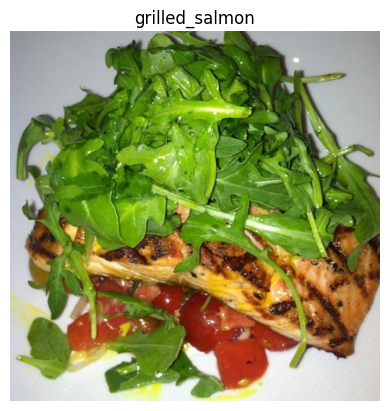

In [6]:
img = view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

### 2. Preprocess the data

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create test and train generators and rescale it
train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255.)

In [8]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               class_mode = "categorical",
                                               batch_size = 32)

test_data = train_datagen.flow_from_directory(test_dir,
                                               target_size = (224,224),
                                               class_mode = "categorical",
                                               batch_size = 32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [9]:
images,labels = next(train_data)
len(images),len(labels)

(32, 32)

In [10]:
len(train_data)

235

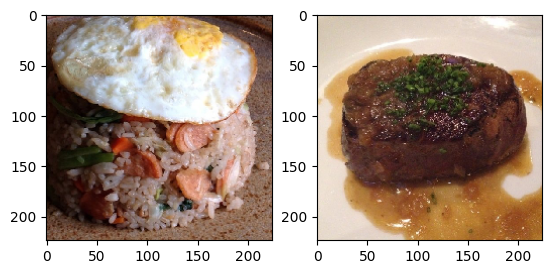

In [11]:
plt.subplot(1,2,1)
plt.imshow(images[0])
plt.subplot(1,2,2)
plt.imshow(images[1])

In [12]:
labels[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 3. Create a Multi-class CNN model (start with a baseline)

Use the model from CNN explainer website for inspiration as it is also on 10 classes classification

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Activation,Dense,Flatten
from tensorflow.keras.models import Sequential

In [14]:
#Set seed
tf.random.set_seed(42)
# Create a model
model_1 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

#Compile it
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit it
history_1 = model_1.fit(train_data,
            epochs=5,
            steps_per_epoch = len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 126ms/step - accuracy: 0.1463 - loss: 2.2817 - val_accuracy: 0.2556 - val_loss: 2.0435
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 111ms/step - accuracy: 0.3188 - loss: 1.9436 - val_accuracy: 0.2756 - val_loss: 1.9924
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.4493 - loss: 1.6445 - val_accuracy: 0.3072 - val_loss: 2.0284
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.6206 - loss: 1.1423 - val_accuracy: 0.2940 - val_loss: 2.1982
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 127ms/step - accuracy: 0.8053 - loss: 0.6396 - val_accuracy: 0.2704 - val_loss: 2.9823


### 4. Evaluate the model


In [15]:
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.2611 - loss: 2.9879


[2.9823358058929443, 0.2703999876976013]

In [16]:
#plot validation and training curves separately
import pandas as pd
def plot_loss_curves(history):
  df=pd.DataFrame(history.history)

  acc = df["accuracy"]
  val_acc = df["val_accuracy"]
  loss = df["loss"]
  val_loss = df["val_loss"]
  epochs = range(len(history.history["loss"]))
  plt.figure(figsize = (10,10))
  #ACCURACY
  plt.subplot(2,2,1)
  plt.plot(epochs,acc,label = "training_accuracy")
  plt.plot(epochs,val_acc,label = "validation_accuracy")
  plt.title("Accuracy")
  plt.legend()
  # LOSS
  plt.subplot(2,2,2)
  plt.plot(epochs,loss,label = "training_loss")
  plt.plot(epochs,val_loss,label = "validation_loss")
  plt.title("Loss")
  plt.legend()
  plt.show()
  return None

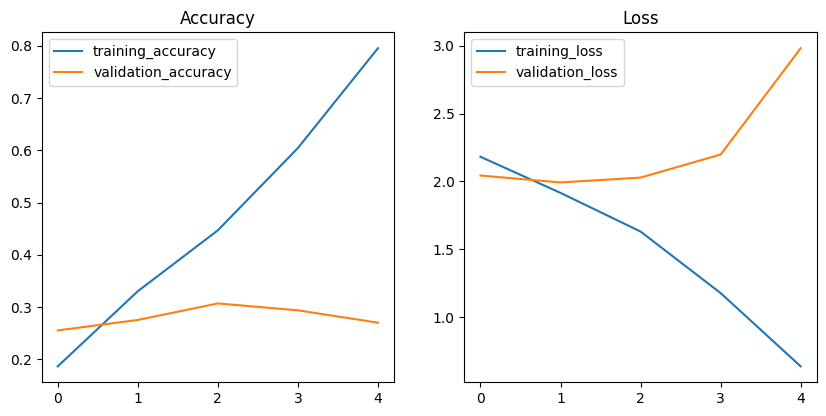

In [17]:
plot_loss_curves(history_1)

What does the graph tell us -
Basically our model is **overfitting** - learning the seen data and not generalising and hence performing poor with unseen data. Good accuracy with train data and unacceptable accuracy with test data.

### 5. Adjust model to beat our baseline (remove overftting/beat baseline by tweaking hyperparameters)
Fix overfitting by-
1. **Get more data ** - having more data gives more opportunity to learn
2. ** Simplify the model ** - if current model is overfitting the data, it maybe too complicated of a model, one way to simplify is to : reduce # no. of layers or reduce # hidden units in layers
3. Use ** data augmentation ** - data augmentationn maniulates the training data in such a way to add more diversity to it (without altering the original data)
4. ** Use transfer learning ** - transfer learning leverages the patterns another model has learned on similar data to your own dataset.

In [18]:
#Set seed
tf.random.set_seed(42)
#Create a model
model_2 = Sequential([
    Conv2D(10,3,activation = "relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation = "softmax")
])

#Compile it
model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
# Fit it

history_2 = model_2.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 115ms/step - accuracy: 0.1909 - loss: 2.2241 - val_accuracy: 0.2912 - val_loss: 2.0374
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 121ms/step - accuracy: 0.3993 - loss: 1.7592 - val_accuracy: 0.3484 - val_loss: 1.8649
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 123ms/step - accuracy: 0.5972 - loss: 1.2478 - val_accuracy: 0.3288 - val_loss: 1.9962
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 107ms/step - accuracy: 0.7990 - loss: 0.7082 - val_accuracy: 0.3096 - val_loss: 2.3537
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 103ms/step - accuracy: 0.9045 - loss: 0.3796 - val_accuracy: 0.2980 - val_loss: 2.8143


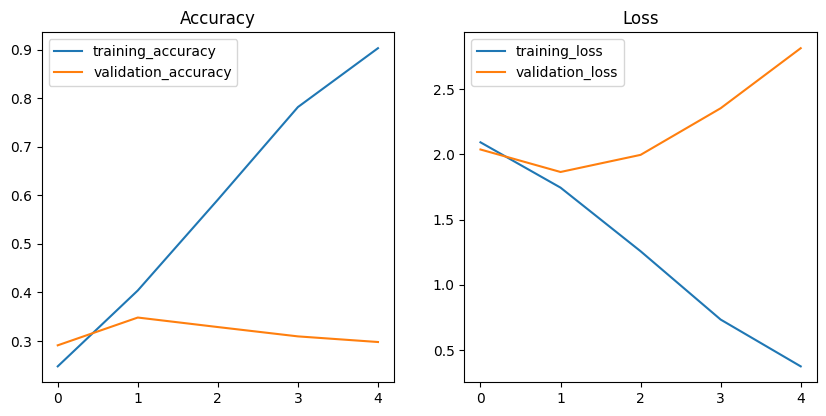

In [19]:
plot_loss_curves(history_2)

In [20]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [21]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       291,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 878,402 (3.35 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 585,602 (2.23 MB)

Simplified the model but the accuracy decreased. So it was not worth it.

### 6. Use data augmentation

In [22]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                          rotation_range =0.2,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          zoom_range = 0.2,
                                          horizontal_flip = True
                                          )
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size = (224,224),
                                                                    class_mode = "categorical",
                                                                    batch_size = 32)


Found 7500 images belonging to 10 classes.


In [23]:
# Only copies the model and not its weights
model_3 = tf.keras.models.clone_model(model_2)

In [24]:
model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [25]:
model_3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       291,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,800 (1.12 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history_3 = model_3.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 98s 411ms/step - accuracy: 0.1847 - loss: 2.2096 - val_accuracy: 0.2920 - val_loss: 2.0349
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 407ms/step - accuracy: 0.2884 - loss: 2.0306 - val_accuracy: 0.3064 - val_loss: 1.9676
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 96s 410ms/step - accuracy: 0.3083 - loss: 1.9815 - val_accuracy: 0.3528 - val_loss: 1.9049
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 97s 412ms/step - accuracy: 0.3184 - loss: 1.9490 - val_accuracy: 0.3764 - val_loss: 1.8414
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 410ms/step - accuracy: 0.3310 - loss: 1.9269 - val_accuracy: 0.3892 - val_loss: 1.8004


In [27]:
#Set seed
tf.random.set_seed(42)
# Create a model
model_4 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

#Compile it
model_4.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit it
history_4 = model_4.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch = len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 103s 428ms/step - accuracy: 0.1283 - loss: 2.3004 - val_accuracy: 0.3000 - val_loss: 1.9807
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 425ms/step - accuracy: 0.2594 - loss: 2.0789 - val_accuracy: 0.3212 - val_loss: 1.9013
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 420ms/step - accuracy: 0.2803 - loss: 2.0294 - val_accuracy: 0.3608 - val_loss: 1.8570
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 99s 420ms/step - accuracy: 0.3020 - loss: 1.9839 - val_accuracy: 0.3676 - val_loss: 1.8242
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 99s 422ms/step - accuracy: 0.3210 - loss: 1.9581 - val_accuracy: 0.3864 - val_loss: 1.7934


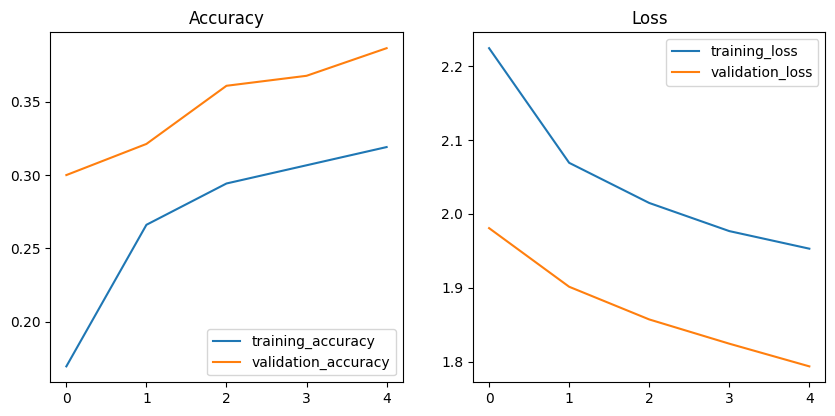

In [28]:
plot_loss_curves(history_4)

In [29]:
model_4.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.3728 - loss: 1.8110


[1.793434739112854, 0.3864000141620636]

### 7.Repeat until satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.
How?
By running lots of experiemtns, namely:
- restructuring our model's architecture (increasing layers/ hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

# Making a prediction with out trained model
Let's use our trained model to make some preductions on our own custom images

In [30]:
# Remind ourselves of our classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [31]:
# Download some images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-sushi.jpeg

--2025-05-20 17:17:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2025-05-20 17:17:41 (54.6 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2025-05-20 17:17:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP 

In [39]:
# Make a prediction using model
#Create a function to import a image and resize it to be able to be used with our model
def load_and_prep(filename,img_shape=224):
  """
  Reads an image from filename and reshapes it into a tensor of desired size(here 224)
  (img_shape,img_shape,color_channels)
  """
  # READ IN THE IMAGE
  img = tf.io.read_file(filename)
  # DECODE THE READ FILE INTO A TENSOR
  img = tf.image.decode_image(img)
  # RESIZE THE IMAGE
  img  = tf.image.resize(img,size = [img_shape,img_shape])
  # RESCALE THE IMAGE AND GET ALL VALUES BETWEEN 0 AND 1
  img = img/255.0
  return img

def pred_and_plot(model,filename,class_names = class_names):
  """
  IMPORTS IMAGE AND MAKES A PREDICTION ON IMAGE
  AND PLOTS IT WITH PREDICTED CLASS NAME
  """
  # IMPORT TARGET IMAGE AND PREPROCESS IT
  img = load_and_prep(filename)
  # MAKE A PREDICTION
  pred = model.predict(tf.expand_dims(img,axis = 0))[0]
  # GET PREDICTED CLASS

  pred_class = class_names[(tf.argmax(pred))]
  # PLOT THE IMAGE AND PREDICTED CLASS

  plt.imshow(img)
  plt.title(f"Predicted : {pred_class} ")
  plt.axis(False)
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


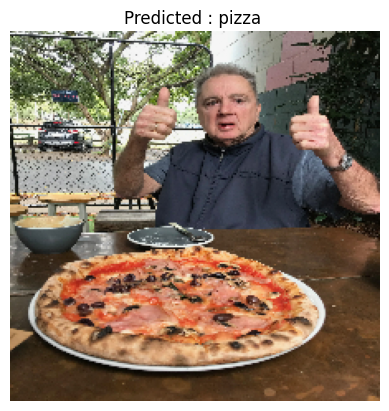

In [42]:
pred_and_plot(model = model_4,
              filename = "/content/03-pizza-dad.jpeg",
              class_names = class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


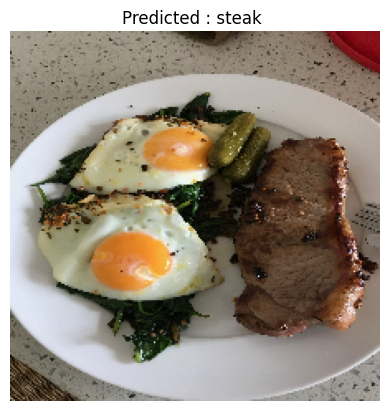

In [43]:
pred_and_plot(model = model_4,
              filename = "/content/03-steak.jpeg",
              class_names = class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


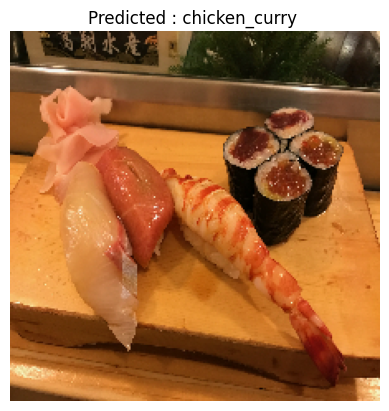

In [46]:
pred_and_plot(model = model_4,
              filename = "/content/03-sushi.jpeg",
              class_names = class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved 39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

## Saving and loading our model

In [50]:
# Save a model
model_4.save("Saved_trained_model_4.h5")

In [53]:
# Load model
load_model = tf.keras.models.load_model("Saved_trained_model_4.h5")
load_model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.3965 - loss: 1.7729


[1.793434977531433, 0.3864000141620636]

In [54]:
model_4.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.3822 - loss: 1.8120


[1.7934346199035645, 0.3864000141620636]